In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

In [3]:
# Preview the dataset
print("First 5 rows of the dataset:")
print(titanic.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
# 1. Data Manipulation with Pandas
# Check missing values
print("\nMissing values:")
print(titanic.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [6]:
# Fill missing 'Embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [7]:
# 2. Numerical Computations with NumPy
# Create a new column categorizing age groups
age_bins = [0, 12, 20, 40, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels)

print("\nAge groups added:")
print(titanic[['Age', 'AgeGroup']].head())


Age groups added:
    Age AgeGroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult


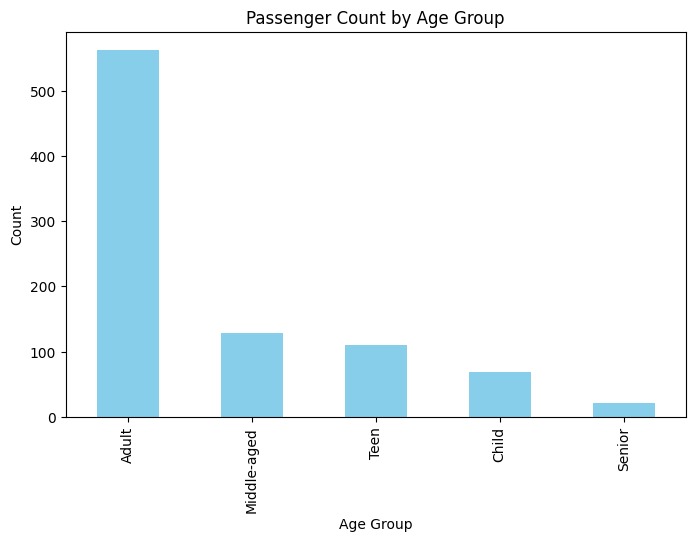

In [8]:
# 3. Visualization with Matplotlib
# Plot the count of passengers in each age group
plt.figure(figsize=(8, 5))
titanic['AgeGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Passenger Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

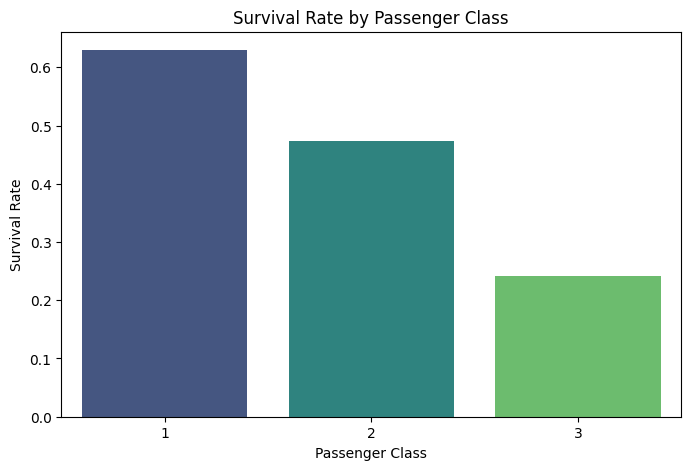

In [9]:
# 4. Advanced Visualization with Seaborn
# Plot survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic, ci=None, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

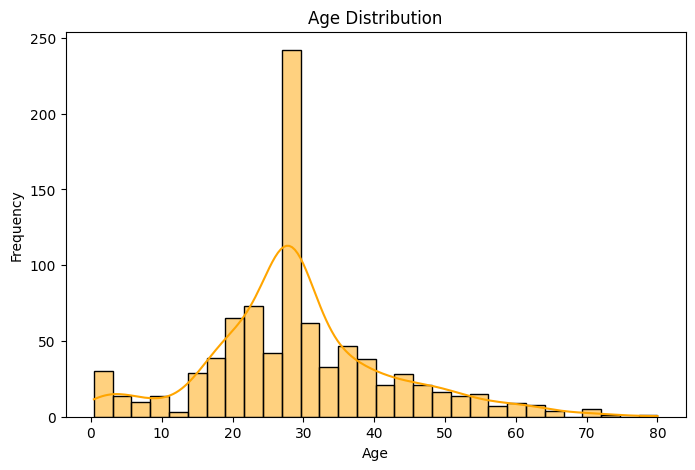

In [10]:
# Plot distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(titanic['Age'], bins=30, kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
# 5. Using Warnings to Avoid Irrelevant Alerts
# Suppose we intentionally do something that generates a warning:
# For example, trying to calculate the logarithm of a negative number
invalid_values = [-1, 2, 3]
log_values = np.log([x if x > 0 else 1 for x in invalid_values])  # Handling invalid inputs manually
print("\nLogarithm values with handling invalid inputs:", log_values)


Logarithm values with handling invalid inputs: [0.         0.69314718 1.09861229]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})  # Encode categorical feature
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = titanic[features]
y = titanic['Survived']

In [14]:

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.7932960893854749
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.78212291 0.78651685 0.7752809  0.7752809  0.79213483]
Mean CV Accuracy: 0.7822672776348


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the best model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the model
best_rf_y_pred = best_rf_model.predict(X_test)
print("Best RF Accuracy:", accuracy_score(y_test, best_rf_y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best RF Accuracy: 0.8491620111731844


In [22]:
# Get feature importance
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))


    Feature  Importance
1       Sex    0.346407
3      Fare    0.274129
2       Age    0.224036
0    Pclass    0.118600
4  Embarked    0.036829
